In [ ]:
#!pip install np_utils

In [ ]:
#import tensorflow as tf
#print(tf.__version__)

In [ ]:
#!pip uninstall tensorflow 
#!pip install tensorflow==2.2.0 

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,MaxPooling2D,Activation,Dropout,Flatten,BatchNormalization,MaxPool1D
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np


In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Finding null values

In [ ]:
def f1_null(train_data):
  count=train_data.isnull().sum().sum()
  return count


In [ ]:
count_null = f1_null(train_data)
print(count_null)

0


 **To check the duplicates values**

In [ ]:
def f1_duplicates(train_data):
  count=train_data.duplicated().sum().sum()
  return count

In [ ]:
count_duplicates = f1_duplicates(train_data)
print(count_duplicates)

0


In [ ]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


**Check the Column name for both train and test data set**

In [ ]:
def to_check_column(train_data):
  column_name = train_data.columns
  return column_name

In [ ]:
train_column_name = to_check_column(train_data)
print("Column_name",train_column_name)

Column_name Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
test_column_name = to_check_column(test_data)
print("Test column_name",test_column_name)

Test column_name Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


**Count Plot**

In [ ]:
### let's use count plot to know the count of each label
def count_plot(train_data):
  sns.countplot(train_data.label)
  

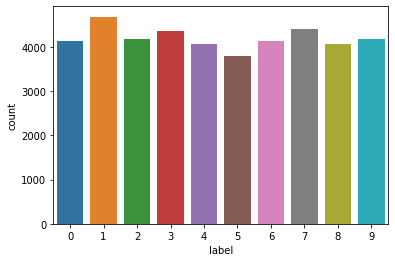

In [ ]:
count_plot(train_data)

Data is already clean. There is no duplicates and no missing values.
Data is already balanced

### Need to find range of pixels

In [ ]:
train_data['pixel106'].value_counts()

0      41624
255       19
254       15
253        9
191        8
       ...  
11         1
176        1
46         1
198        1
193        1
Name: pixel106, Length: 183, dtype: int64

In [ ]:
train_data['pixel10'].value_counts()

0    42000
Name: pixel10, dtype: int64

As per observation,pixel intensities are currently between the range 0 and 255.we proceed to normalize the features between 0 and 1. Converted the numeric class vector to binary one hot encoding

In [ ]:
# Feature Normalization
y = train_data['label']
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
y_train = to_categorical(y, num_classes = 10)

In [ ]:
X = train_data.drop(labels=['label'],axis=1)

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def normalize(data):
  data = data/255.0
  return data

In [ ]:
X = normalize(X)
print(X.shape)

(42000, 784)


In [ ]:
X['pixel106'].value_counts()

0.000000    41624
1.000000       19
0.996078       15
0.992157        9
0.749020        8
            ...  
0.043137        1
0.690196        1
0.180392        1
0.776471        1
0.756863        1
Name: pixel106, Length: 183, dtype: int64

### Reshape the image

In [ ]:
X_train = X

In [ ]:
def image_reshape(X_train):
  X_train = X_train.values.reshape(-1,28,28,1)
  return X_train

In [ ]:
X_train = image_reshape(X_train)

In [ ]:
test_data = image_reshape(test_data)

In [ ]:
print(X_train.shape)
print(test_data.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


Image has (28**28) pixels has been stock into Pandas. DataFrame as 1D Vectors of 784 values. We will reshape all data  that indicates(height,width,channel).Channel 3 means RGB.

In [ ]:
test_data = normalize(test_data)
print(test_data.shape)

(28000, 28, 28, 1)


In [ ]:
def image_show(X,idx):
  plt.figure(figsize=(7,7))
  grid_data = X.iloc[idx].to_numpy().reshape(28,28)
  plt.imshow(grid_data,interpolation=None,cmap='afmhot')
  plt.show()

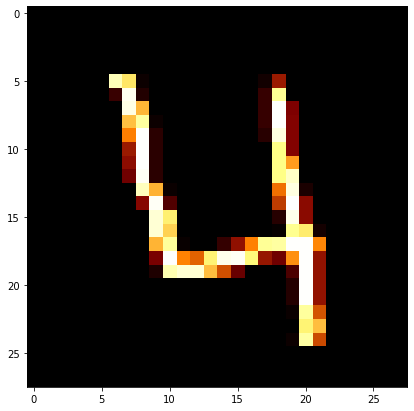

None


In [ ]:
a1=image_show(X,3)
print(a1)

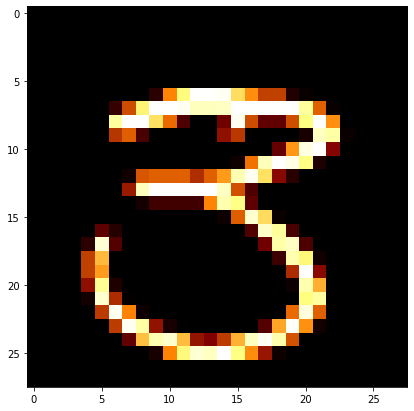

In [ ]:
b1 = image_show(X,7)
b1

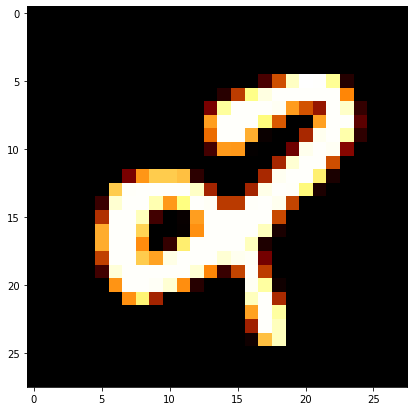

None


In [ ]:
c1= image_show(X,104)
print(c1)

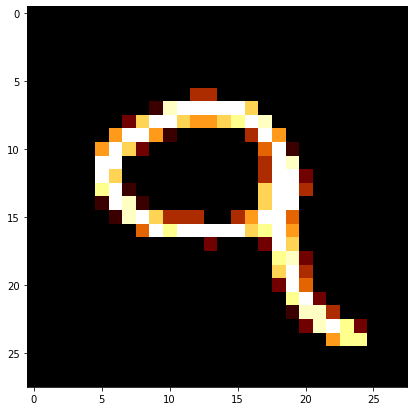

None


In [ ]:
a2 = image_show(X,779)
print(a2)

Splitting train test image dataset

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=0.1,random_state=42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


In [ ]:
# Architecture of CNN --  [[(CNN2D-relu)*2]->Maxpooling->Dropout]*2]->Flatten->Dense->output

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001,rho=0.9,momentum=0.1)

In [ ]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(y_train.shape)

(37800, 10)


In [ ]:
model.fit(x_train,y_train,epochs=2,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/2
756/756 [==============================] - 426s 563ms/step - loss: 0.1790 - accuracy: 0.9430 - val_loss: 0.0745 - val_accuracy: 0.9793
Epoch 2/2
756/756 [==============================] - 426s 564ms/step - loss: 0.0554 - accuracy: 0.9840 - val_loss: 0.0443 - val_accuracy: 0.9881


### Saved and load the Model

In [ ]:
!mkdir -p saved_model

In [ ]:
model.save(' ')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.save('saved_model/my_model')

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


### Reload a fresh keras model from saved model

In [ ]:
#new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
#new_model.summary()

### Let's Do Confusion Matrix

In [ ]:
#predict the values from validation data set
y_pred = model.predict(x_val)
#convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis=1)
#convert validation observation to one hot vector
y_true = np.argmax(y_val,axis=1)
#calculate the confusion matrix
confusion_matrix(y_true,y_pred_classes)

array([[406,   0,   0,   0,   0,   0,   5,   0,   2,   0],
       [  0, 463,   0,   0,   3,   0,   0,   0,   1,   1],
       [  0,   2, 415,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 428,   0,   1,   0,   3,   0,   2],
       [  0,   0,   0,   0, 402,   0,   1,   0,   1,   3],
       [  0,   0,   0,   2,   0, 374,   2,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 413,   0,   1,   0],
       [  0,   0,   3,   0,   0,   0,   0, 435,   1,   1],
       [  0,   0,   1,   0,   1,   0,   2,   0, 402,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   3, 412]])

In [ ]:
classification_report(y_true,y_pred_classes)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99       413\n           1       1.00      0.99      0.99       468\n           2       0.99      0.99      0.99       418\n           3       1.00      0.98      0.99       435\n           4       0.98      0.99      0.98       407\n           5       1.00      0.98      0.99       380\n           6       0.98      1.00      0.99       414\n           7       0.99      0.99      0.99       440\n           8       0.97      0.99      0.98       406\n           9       0.98      0.98      0.98       419\n\n    accuracy                           0.99      4200\n   macro avg       0.99      0.99      0.99      4200\nweighted avg       0.99      0.99      0.99      4200\n'

In [ ]:
y_predict = model.predict(test_data)

#select the index with maximum probability
results = np.argmax(y_predict,axis=1)


In [ ]:
print(results)

[2 0 9 ... 3 9 2]


In [ ]:
df_test = pd.read_csv("sample_submission.csv")
df_test.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
y_predict_lr_test = pd.DataFrame({"ImageId":df_test["ImageId"],"Label":results})
y_predict_lr_test.to_csv('mnist_digit_recognizer.csv', index=False)  
y_predict_lr_test.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


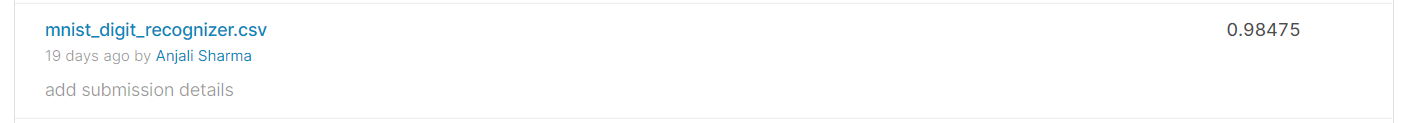

### Apply image Augmented Technique

In [ ]:
def image_augmentation(img,transform):
  'helper function to show the data augmentation'
  img = PIL.Image.open(img)
  fig,ax = plt.subplot(1,2,figsize=(2,4))
  ax[0].set_title(f'original image {img.size}')
  ax[0].image_show(img)
  ax[1].set_title(f'transformed image {img.size}')
  ax[1].tansform(img)
  ax[1].image_show(img)


In [ ]:
#image_resize = transforms.Resize((23,45))
#image_augmentation(a1,image_resize)

In [ ]:
print(x_train.shape)
print(y_val.shape)

(37800, 28, 28, 1)
(4200, 10)


**Adding BatchNormalization**

In [ ]:
from tensorflow.python.keras.backend import batch_normalization
# Architecture of CNN --  [[(CNN2D-relu)*2]->Maxpooling->Dropout]*2]->Flatten->Dense->output

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization(axis=1))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        112       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        112       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        56        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/10
756/756 [==============================] - 969s 1s/step - loss: 0.1237 - accuracy: 0.9620 - val_loss: 0.0612 - val_accuracy: 0.9840
Epoch 2/10
756/756 [==============================] - 964s 1s/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0439 - val_accuracy: 0.9890
Epoch 3/10
756/756 [==============================] - 963s 1s/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0507 - val_accuracy: 0.9857
Epoch 4/10
756/756 [==============================] - 960s 1s/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 5/10
756/756 [==============================] - 953s 1s/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 6/10
756/756 [==============================] - 959s 1s/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0343 - val_accuracy: 0.9924
Epoch 7/10
756/756 [==============================] - 969s 1s/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0427 - val_accuracy: 0.9900

In [ ]:
!mkdir -p saved_model_v2

In [ ]:
model.save('saved_model_v2/my_model_v2')

In [ ]:
#predict the values from validation set
y_pred = model.predict(x_val)
# convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis=1)
#convert validation obserbation to one hot vecors
y_true = np.argmax(y_val,axis=1)
#let's call confusion matrix
confusion_matrix(y_true,y_pred_classes)

array([[412,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 467,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 416,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0, 433,   0,   1,   0,   0,   0,   1],
       [  0,   1,   0,   0, 402,   0,   0,   0,   0,   4],
       [  0,   0,   0,   5,   0, 366,   1,   0,   3,   5],
       [  0,   0,   0,   0,   0,   0, 412,   0,   2,   0],
       [  0,   0,   4,   1,   0,   0,   0, 435,   0,   0],
       [  3,   2,   0,   0,   0,   0,   2,   0, 399,   0],
       [  0,   1,   0,   0,   4,   0,   0,   1,   3, 410]])

In [ ]:
y_predict = model.predict(test_data)
#let's take index with maximum probabilty
result = np.argmax(y_predict,axis=1)
print(result)

[2 0 9 ... 3 9 2]


In [ ]:
df_test_batch = pd.read_csv("sample_submission.csv")
df_test_batch.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
y_predict_cnn_batch_test = pd.DataFrame({"ImageId": df_test_batch["ImageId"],"Label":result})
y_predict_cnn_batch_test.to_csv("mnist_data_set_submission_v2.csv",index=False)
y_predict_cnn_batch_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


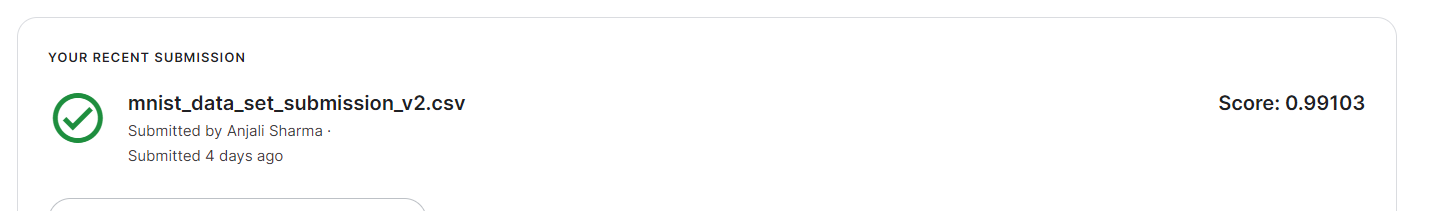

In [ ]:
!tar -czvf mnist.tar.gz ./saved_model

./saved_model/
./saved_model/my_model/
./saved_model/my_model/saved_model.pb
./saved_model/my_model/assets/
./saved_model/my_model/variables/
./saved_model/my_model/variables/variables.index
./saved_model/my_model/variables/variables.data-00000-of-00001


In [ ]:
!tar -czvf mnist_v1.tar.gz ./saved_model_v2

./saved_model_v2/
./saved_model_v2/my_model_v2/
./saved_model_v2/my_model_v2/saved_model.pb
./saved_model_v2/my_model_v2/assets/
./saved_model_v2/my_model_v2/variables/
./saved_model_v2/my_model_v2/variables/variables.index
./saved_model_v2/my_model_v2/variables/variables.data-00000-of-00001
